In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df_news = pd.read_csv("../src/data/analysed_analyst_ratings/sentiment_analysed_ratings.csv")

In [144]:
file_paths = {
    'Apple': '../src/data/yfinance_data/AAPL_historical_data.csv',
    'Amazon': '../src/data/yfinance_data/AMZN_historical_data.csv',
    'Google': '../src/data/yfinance_data/GOOG_historical_data.csv',
    'Meta': '../src/data/yfinance_data/META_historical_data.csv',
    'Microsoft': '../src/data/yfinance_data/MSFT_historical_data.csv',
    'Tesla': '../src/data/yfinance_data/TSLA_historical_data.csv',
    'Nvidia': '../src/data/yfinance_data/NVDA_historical_data.csv'
}

AAPL_data = pd.read_csv(file_paths['Apple'])
AMZN_data = pd.read_csv(file_paths['Amazon'])
GOOG_data = pd.read_csv(file_paths['Google'])
META_data = pd.read_csv(file_paths['Meta'])
MSFT_data = pd.read_csv(file_paths['Microsoft'])
NVDA_data = pd.read_csv(file_paths['Nvidia'])
TSLA_data = pd.read_csv(file_paths['Tesla'])

# Add a 'Stock' column to identify each dataset
AAPL_data['Stock'] = 'AAPL'
AMZN_data['Stock'] = 'AMZN'
GOOG_data['Stock'] = 'GOOG'
META_data['Stock'] = 'META'
MSFT_data['Stock'] = 'MSFT'
NVDA_data['Stock'] = 'NVDA'
TSLA_data['Stock'] = 'TSLA'

# Merge the data into one DataFrame
df_stock = pd.concat(
    [AAPL_data, AMZN_data, GOOG_data, META_data, MSFT_data, NVDA_data, TSLA_data],
    ignore_index=True
)

# Display the merged data
print("Merged Stock Data:")
df_stock.head()

Merged Stock Data:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [145]:
print(df_news.shape)
df_news.head(2)

(1407328, 12)


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,email_domain,cleaned_headline,sentiment_score,sentiment_label
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,NaN,stocks hit 52week highs friday,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,NaN,stocks hit 52week highs wednesday,0.0,neutral


In [146]:
print(df_stock.shape)
df_stock.head(2)

(45428, 10)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL


Normalizing dates

In [147]:
# Convert df_stock 'Date' column to datetime
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Convert df_news 'date' column to datetime and remove timezone info
df_news['date'] = pd.to_datetime(df_news['date'])


# Display the first few rows of both datasets
print(df_news[['date', 'headline']].head())
print(df_stock[['Date', 'Close']].head())


                       date                                           headline
0 2020-06-05 10:30:54-04:00            Stocks That Hit 52-Week Highs On Friday
1 2020-06-03 10:45:20-04:00         Stocks That Hit 52-Week Highs On Wednesday
2 2020-05-26 04:30:07-04:00                      71 Biggest Movers From Friday
3 2020-05-22 12:45:06-04:00       46 Stocks Moving In Friday's Mid-Day Session
4 2020-05-22 11:38:59-04:00  B of A Securities Maintains Neutral on Agilent...
        Date     Close
0 1980-12-12  0.128348
1 1980-12-15  0.121652
2 1980-12-16  0.112723
3 1980-12-17  0.115513
4 1980-12-18  0.118862


Calculate Daily Stock Returns

In [148]:
# Ensure stock data is sorted by date
df_stock = df_stock.sort_values(by='Date')
df_stock['daily_return'] = df_stock.groupby('Stock')['Close'].pct_change()

print(df_stock[['Date', 'Stock', 'Close', 'daily_return']].head())

        Date Stock     Close  daily_return
0 1980-12-12  AAPL  0.128348           NaN
1 1980-12-15  AAPL  0.121652     -0.052171
2 1980-12-16  AAPL  0.112723     -0.073398
3 1980-12-17  AAPL  0.115513      0.024751
4 1980-12-18  AAPL  0.118862      0.028992


Aggregate Sentiments by Date


In [149]:
# Group by date and calculate the average sentiment score
df_news_daily_sentiment = df_news.groupby(['stock', df_news['date'].dt.date])['sentiment_score'].mean().reset_index()
df_news_daily_sentiment.rename(columns={'date': 'Date', 'stock': 'Stock', 'sentiment_score': 'avg_sentiment_score'}, inplace=True)

df_news_daily_sentiment['Date'] = pd.to_datetime(df_news_daily_sentiment['Date'])

# Display the aggregated sentiment scores
print(df_news_daily_sentiment.head())


  Stock       Date  avg_sentiment_score
0     A 2020-05-22               0.0480
1     A 2020-05-26               0.0000
2     A 2020-06-03               0.0000
3     A 2020-06-05               0.0000
4    AA 2020-05-18               0.8519


In [150]:
merged_df = pd.merge(df_stock[['Date', 'Stock', 'daily_return']], df_news_daily_sentiment[['Date', 'Stock', 'avg_sentiment_score']], on=['Date', 'Stock'], how='inner')

# Drop rows with missing values (if any)
merged_df = merged_df.dropna(subset=['daily_return', 'avg_sentiment_score'])

# Verify the merged dataset
merged_df.head()


,Date,Stock,daily_return,avg_sentiment_score
0,2020-06-02,NVDA,0.002158,0.220200
1,2020-06-04,GOOG,-0.016848,0.000000
2,2020-06-05,GOOG,0.018560,-0.411033
3,2020-06-08,NVDA,-0.012892,0.168667
4,2020-06-08,GOOG,0.005715,0.542300


Create Lagged Sentiment Scores and Lagged Stock Returns

In [151]:
df_news_daily_sentiment['lagged_sentiment_score'] = df_news_daily_sentiment.groupby('Stock')['avg_sentiment_score'].shift(1)

# Merge the lagged sentiment scores with the stock data
merged_df = pd.merge(merged_df, df_news_daily_sentiment[['Date', 'Stock', 'lagged_sentiment_score']], 
                     on=['Date', 'Stock'], how='inner')

# Create lagged daily returns (1-day lag)
df_stock['lagged_daily_return'] = df_stock['daily_return'].shift(1)
merged_df = pd.merge(merged_df, df_stock[['Date', 'Stock', 'lagged_daily_return']], 
                     on=['Date', 'Stock'], how='inner')

# Drop rows with missing values (if any)
merged_df = merged_df.dropna(subset=['lagged_daily_return', 'lagged_sentiment_score'])
merged_df.head()

,Date,Stock,daily_return,avg_sentiment_score,lagged_sentiment_score,lagged_daily_return
0,2020-06-02,NVDA,0.002158,0.220200,0.421500,0.000554
2,2020-06-05,GOOG,0.018560,-0.411033,0.000000,0.023398
3,2020-06-08,NVDA,-0.012892,0.168667,0.220200,0.019798
4,2020-06-08,GOOG,0.005715,0.542300,-0.411033,0.016536
5,2020-06-09,NVDA,0.027371,0.729600,0.168667,0.007645


Correlation Analysis

In [152]:
# Calculate Pearson correlation coefficient
correlation_original = merged_df['daily_return'].corr(merged_df['avg_sentiment_score'])
correlation_lagged = merged_df['daily_return'].corr(merged_df['lagged_sentiment_score'])

print(f"Correlation between news sentiment and daily stock returns: {correlation_original:.4f}")
print(f"Correlation between news sentiment and daily stock returns: {correlation_lagged:.4f}")


Correlation between news sentiment and daily stock returns: 0.1202
Correlation between news sentiment and daily stock returns: 0.2644


Correlation between daily stock returns and original news sentiment: 0.12024348774824313
Correlation between daily stock returns and lagged news sentiment: 0.26437354314759903


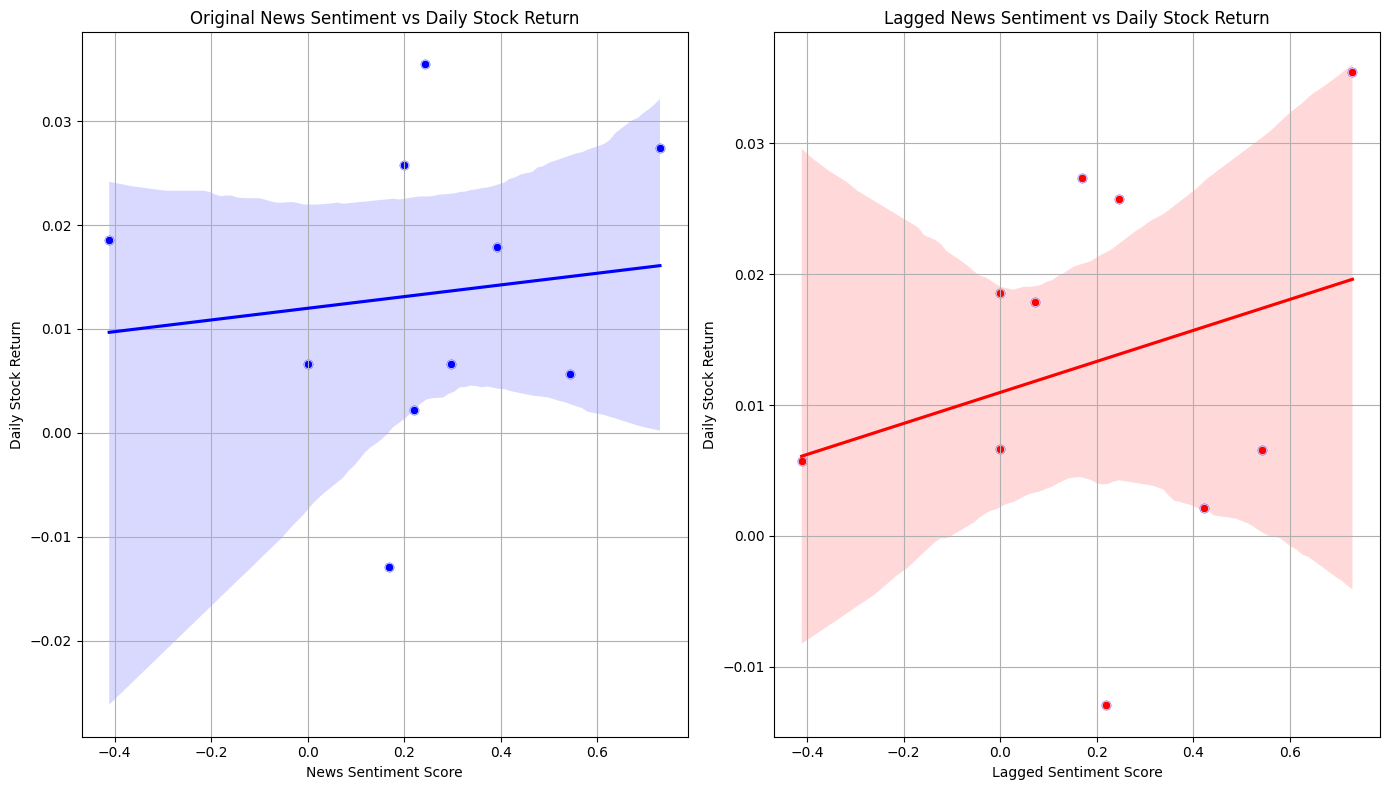

In [153]:
# Use both the original and lagged sentiment score for more data points
df_news_daily_sentiment['lagged_sentiment_score'] = df_news_daily_sentiment.groupby('Stock')['avg_sentiment_score'].shift(1)

# Merge with stock data
merged_df = pd.merge(df_stock, df_news_daily_sentiment[['Date', 'Stock', 'avg_sentiment_score', 'lagged_sentiment_score']], on=['Date', 'Stock'], how='inner')

# Drop rows with missing values in daily returns, sentiment, or lagged sentiment
merged_df = merged_df.dropna(subset=['daily_return', 'avg_sentiment_score', 'lagged_sentiment_score'])

# Calculate the correlation between daily stock returns and both sentiment scores
correlation_original = merged_df['daily_return'].corr(merged_df['avg_sentiment_score'])
correlation_lagged = merged_df['daily_return'].corr(merged_df['lagged_sentiment_score'])

print(f"Correlation between daily stock returns and original news sentiment: {correlation_original}")
print(f"Correlation between daily stock returns and lagged news sentiment: {correlation_lagged}")

# Plot both original and lagged sentiment score against daily returns

plt.figure(figsize=(14, 8))

# Plot for original sentiment
plt.subplot(1, 2, 1)
sns.regplot(x=merged_df['avg_sentiment_score'], y=merged_df['daily_return'], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
sns.scatterplot(x=merged_df['avg_sentiment_score'], y=merged_df['daily_return'], color='blue')
plt.title('Original News Sentiment vs Daily Stock Return')
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.grid(True)

# Plot for lagged sentiment
plt.subplot(1, 2, 2)
sns.regplot(x=merged_df['lagged_sentiment_score'], y=merged_df['daily_return'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
sns.scatterplot(x=merged_df['lagged_sentiment_score'], y=merged_df['daily_return'], color='red')
plt.title('Lagged News Sentiment vs Daily Stock Return')
plt.xlabel('Lagged Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.grid(True)

plt.tight_layout()
plt.show()
